## Project Concepts of Data Science

### Authors: Eleftherios Kokkinis (2262635) -  Engie Rakipi

1. [Introduction](#Introduction)
    1. [Definition of a Ternary Search Tree](#Definition_of_a_Ternary_Search_Tree)
    2. [Brief description of the algorithm](#Brief_description_of_the_algorithm)
    3. [Avantages of TSTs](#advantages_of_TSTs)
  
    
2. [Complexity Analysis of TST](#Complexity_analysis_of_the_operations)
    1. [Time complexity of traversing the trie](#Trie_complexity)
    2. [Time complexity of traversing the BSTs in a TST](#BST_complexity)
    3. [Balanced BSTs in a TST](#Balanced_BSTs)
    4. [Unbalanced BSTs in a TST](#Unbalanced_BSTs)
    5. [Best and Worst case scenarios](#Best_and_Worst_case)
    6. [Time complexity for a Search miss](#Search_miss)
    7. [Time complexity of all_strings()](#all_strings)

3. [Implementation](#Implementation)
    1. [Python class definition for the TST](#Python_class_definition_for_the_TST)
    2. [Documentation](#Documentation)
    4. [Example Usage](#Example_Usage)
    
5. [Testing](#Testing)
    
    
6. [Performance](#Discussion)
    1. [Discussion on the expected complexity of the algorithm and operations](#Discussion_on_the_expected_complexity)
   2. [Comparison of the implementation with the theoretical expectations](#Comparison_of_the_implementation_with_the_theoretical_expectations)
    3. [Generation of a larger dataset](#Generation_of_a_larger_dataset)
    4. [Benchmarking the scaling behavior of the implementation](#Benchmarking_the_scaling_behavior_of_the_implementation)
    5. [Analysis and interpretation of the benchmarking results](#Analysis_and_interpretation_of_the_benchmarking_results)
    
    
8. [Conclusion](#Conclusion)
    1. [Summary of the project](#Summary_of_the_project)
    2. [Potential improvements and future work](#Potential_improvements_and_future_work)

9. [References](#references)

## Introduction <a name="Introduction"></a>

The goal of this project is to implement a Ternary Search Tree (TST) in Python, with operations for insertion, searching, and retrieving all strings. We will also analyze the time complexity of these operations and benchmark the implementation to verify its performance characteristics. In the end, this project should be able to provide an understanding of TSTs and their performance characteristics, as well as a working implementation of a TST in Python.

### Definition of a Ternary Search Tree <a name="Definition_of_a_Ternary_Search_Tree"></a>

A Ternary Search Tree (TST) is a special type of trie data structure where nodes are arranged in a manner similar to a binary search tree, but with up to three children rather than the binary tree's limit of two. Each node has a character, three links and a value. The three links correspond to keys whose current characters are less than, equal to, or greater than the node’s character ([Sedgewick and Wayne, 2011](#references)). Like other prefix trees, a TST can be used to store strings over an alphabet. It is efficient for queries like "Give me all strings with the prefix 'abc'", which is particularly useful in applications like providing word suggestions in a text editor.

### Brief description of the algorithm <a name="Brief_description_of_the_algorithm"></a>

To search and insert we first compare the first character in the key with the character at the root. If it less, we take the left link; if it is greater, we take the right link; and if it is equal, we take the middle link and move to the next search key character. In each case, we apply the algorithm recursively. We terminate with a search miss if we encounter a null link or if the node where the search ends has a null value, and we terminate with a search hit if the node where the search ends has a non-null value.


This representation was initially provided by Jon Bentley and Sedgewick. A ternary search tree takes the advantages of binary search trees and tries. That means it combines the memory efficiency of BSTs and the time efficiency of tries. ([Karumanchi, N., 2016](#references))


To insert a new key, we search, then add new nodes for the characters in the tail of the key. We use the characters of the key to guide us down the TST until reaching the last character of the key or a null link. At this point, one of the following two conditions holds:

1) We encountered a null link before reaching the last character of the key. In this
case, there is no trie node corresponding to the last character in the key, so we
need to create nodes for each of the characters in the key not yet encountered
and set the value in the last one to the value to be associated with the key.


2) We encountered the last character of the key before reaching a null link. In this
case, we set that node’s value to the value to be associated with the key (whether
or not that value is null), as usual with our associative array convention.

### Complexity analysis<a name="Complexity_analysis_of_the_operations"></a>

Let's define:

N = number of keys in the TST \
L = length of the key \
R = alphabet size (26 for the English alphabet) 

**Search and Insert Cost**: The cost of a search hit operation (searching for a key that exists or inserting a key) in a TST is determined by two factors: the cost of traversing the trie structure (which is proportional to the length of the key, L) and the cost of traversing the Binary Search Tree representation of each trie node.

Both the search and insert operatiosn in a TST have similar cost for a search hit. That's because in order to insert a key we need to find the position where the key should be inserted, which involves traversing the TST in the same way as a search operation. Once we find the position, we insert the key, which takes constant time.

#### Time complexity of traversing the trie<a name="Trie_complexity"></a>

Specifically about traversing the trie structure, in a TST, each node contains a character of a key. As we described previously when we're searching for a key, we start at the root of the TST and compare the first character of our key with the character at the current node. If they match, we move to the middle child and proceed to the next character in our key or we move to the left/right child. This process continues until we've either found our key or reached a null link.

The cost of this traversal is proportional to the length of the key, L, because we need to make a comparison for each character in the key. This is represented as O(L), where O is the notation for time complexity.

Although the time complexity O(L) represents the number of character comparisons in the key itself, it doesn't account for the comparisons that we need to do to navigate the tree structure.

#### Time complexity of traversing the BSTs in a TST<a name="BST_complexity"></a>

Now, each node in a TST also acts like a Binary Search Tree for the characters of the keys. So, when we're at a node and we want to move to the child that corresponds to the next character in our key, we need to traverse this BST. The cost of this traversal depends on how well balanced the TST (all the BSTs) is.

#### Balanced BSTs <a name="Balanced_BSTs"></a>

In a perfectly balanced BST, the number of nodes doubles with each additional level of the tree, so the height of the tree (and therefore the maximum number of nodes that we need to examine in a search operation) is logarithmic in the number of keys N. Therefore, the cost the search cost in a BST is O(${\log N}$).

So, the total cost of a search operation in a TST is the sum of the cost of traversing the trie structure an of traversing the BSTs: O(L + ${\log N}$ ).

#### Unbalanced BSTs <a name="Unbalanced_BSTs"></a>

However, if the keys are not randomly inserted, the BSTs in our TST would be unbalanced. For instance, in the case where the keys are inserted in sorted order the TST would degenerate into a linked list and the search cost would become linear in the number of keys, N, time complexity: O(N).

Therefore, the time complexity of a search in a TST in that case would be O(L + N).


#### Base and Worst Case <a name="Base_and_Worst_Case"></a>

In conclusion we can say that we have a best case and worst case scenario when considering the algorithm's time complexity.

Best Case: The best case occurs when the TST is perfectly balanced, i.e., the keys are evenly distributed so that each left and right subtree contains roughly the same number of nodes. In this case, the time complexity is O(L), where L is the length of the key. This is because we only need to compare each character in the key once.

Worst Case: The worst case occurs when the TST is unbalanced, i.e., all the keys are such that they always go to the left child or the right child, making the TST resemble a linked list. In this case, the time complexity is O(L + N) as searching would require traversing through most or all of the keys (N), plus the comparisons equal to the length of the key (L). That's because we might have to traverse almost all the nodes in the tree to find or insert a key.

#### Example

As an example we consider a TST with 8 keys, and we're searching for a key of length 3.

The cost of traversing the trie structure would be O(3) = 3.

The cost of traversing the balanced BSTs representations of each trie node is logarithmic in the number of keys, so it's O(${\log 8}$) = 3.

Therefore, the total cost of the search operation would O(3 + 3) = O(6).

On the other hand, the time complexity of traversing unabalanced TST would be O(8) = 8 . \
The total cost of the search of the TST would be O(3 + 8) = O(11) = 11


#### Time complexity of a search miss <a name="Search_miss"></a>

The cost of a search miss (searching for a key that does not exist) relies on the assumption that most of the nodes in the TST behave like random BSTs ([Sedgewick and Wayne, 2011](#references)). This means that the average path length in these BSTs is ln R, where R is the number of different character values. Therefore the total cost of a search miss is: $$ \log_R N = \frac{\ln N}{\ln R} \cdot \ln R = \ln N $$

#### Time complexity of all_strings() <a name="all_strings"></a>

**all_strings()** cost: For retrieving all strings from a TST we would need to visit every node to retrieve all the keys. Therefore the time complexity for this operation would be O(N), where N is the total number of nodes in the TST.

Although we previously defined N as the number of keys in the tree, this is not necessarily the same as the number of nodes. Especially if we have a lot of keys with common prefixes. Each key in a TST is represented as a path from the root to a node, and each character in the key corresponds to a node along this path. Therefore, the total number of nodes in the TST can be much larger than the number of keys. So while the time complexity of retrieving all keys is technically O(N), in practice the number of nodes N can be much larger than the number of keys.

## Implementation <a name="Implementation"></a>

Implementation of a TST in Python, using recursion.

In [1]:
%load_ext autoreload
%autoreload 2

### Python class definition for the TST <a name="Python_class_definition_for_the_TST"></a>

In [2]:
class Node:
    """
    Node class represents a single node in the Ternary Search Tree (TST).
    """
    def __init__(self, char=None, left=None, mid=None, right=None, val=None):
        """
        We Initialize a Node with character, left, middle, right child nodes and a value.
        """
        self.char = char
        self.left = left
        self.mid = mid
        self.right = right
        self.val = val

class TernarySearchTree:
    """
    TST (Ternary Search Tree) class represents a TST data structure.
    """
    def __init__(self):
        """
        Initialize a TST with a root Node and size.
        """
        self.root = Node()
        self.size = 0

    def search(self, key, exact=False):
        """
        Search for a key in the TST.
        Takes a key (str): The key to search for.
        Returns bool: True if the key is found, False otherwise.
        """
        if key == '':
            return not exact
        else:
            node = self._search(self.root.mid, key, 0)
            if exact and node is not None:
                return node.val is not None
            return node is not None

    def _search(self, node, key, d):
        """
        Helper method for search. Recursively search for the key in the TST.
            node (Node): The current node.
            key (str): The key to search for.
            d (int): The current depth in the TST.
        Return:
            Node: The node if the key is found, None otherwise.
        """
        if node is None:
            return None
        char = key[d]
        if char < node.char:
            return self._search(node.left, key, d)
        elif char > node.char:
            return self._search(node.right, key, d)
        elif d < len(key) - 1:
            return self._search(node.mid, key, d + 1)
        else:
            return node

    def insert(self, key):
        """
        Insert a key into the TST.
        """
        if key == '':
            if self.root.val is None:
                self.size += 1
            self.root.val = True
        else:
            if not self.search(key):
                self.size += 1
            self.root.mid = self._insert(self.root.mid, key, 0)

    def _insert(self, node, key, d):
        """
        Helper method for insert. Recursively insert the key into the TST.
        Takes:
            node (Node): The current node.
            key (str): The key to insert.
            d (int): The current depth in the TST.
        Return"
            Node: The inserted node.
        """
        char = key[d]
        if node is None:
            node = Node(char)
        if char < node.char:
            node.left = self._insert(node.left, key, d)
        elif char > node.char:
            node.right = self._insert(node.right, key, d)
        elif d < len(key) - 1:
            node.mid = self._insert(node.mid, key, d + 1)
        else:
            node.val = True
        return node


    def all_strings(self):
        """
        Get all strings in the TST.
        Returns list of all strings in the TST.
        """
        return self._all_strings(self.root, "")

    def _all_strings(self, node, prefix):
        """
        Helper method for all_strings. Recursively get all strings in the TST.
        """
        if node is None:
            return []
        if node.val is not None:
            keys = [prefix + (node.char if node.char is not None else '')]
        else:
            keys = []
        keys += self._all_strings(node.left, prefix)
        keys += self._all_strings(node.mid, prefix + (node.char if node.char is not None else ''))
        keys += self._all_strings(node.right, prefix)
        return keys

    def __len__(self):
        """
        Get the number of keys in the TST.
        """
        return len(self.all_strings())

    def __repr__(self, node=None, depth=0, edge_label=''):
        """
        Represent the TST as a string.
        Indicates whether each node terminates a string.
        Indicates whether each node is a left, middle, or right child with proper indentation.
        """
        if node is None:
            node = self.root
        s = ' ' * depth * 2
        s += edge_label
        if node.char is not None:
            s += 'char: ' + node.char + ', '
        s += 'terminates: ' + str(node.val is not None) + '\n'
        if node.left is not None:
            s += self.__repr__(node.left, depth + 1, '_lt: ')
        if node.mid is not None:
            s += self.__repr__(node.mid, depth + 1, '_eq: ')
        if node.right is not None:
            s += self.__repr__(node.right, depth + 1, '_gt: ')
        return s

#### Documentation <a name="Documentation"></a>

The Node class is a helper class that represents a node in the ternary search tree. Each node contains a character (char), a value (val), and references to three child nodes (left, mid, right).

__init__ in Node class: This is the constructor for the Node class. It initializes a new node with the given character (char), left, middle, and right children (left, mid, right), and a value (val). The value is used to mark the end of a string in the TST.

The TST class is the main class that represents the ternary search tree. It has a single attribute, root, which is the root node of the tree.

__init__ in TST class: This is the constructor for the TST class. It initializes a new TST with a root node and a size of 0.

The search method retrieves the value associated with a given key. If the key is an empty string, it checks if the root node has a value (which would indicate that the empty string is a valid string in the TST). Otherwise, it calls the _search helper function to search for the key in the TST.

_search: This is a helper function for the search function. It performs a recursive search for the key in the TST. It compares the current character in the key with the character in the current node and decides whether to go left, right, or down the middle based on the comparison.

The insert method inserts a key-value pair into the tree.

all_strings: This function returns all the strings in the TST. It calls the _all_strings helper function with the root node and an empty prefix.

_all_strings: This is a helper function for the all_strings function. It performs a recursive traversal of the TST and collects all the strings. It constructs each string by concatenating the characters along the path from the root to a node with a non-None value.

the repr method recursively traverses the TST and for each node, it first traverses the left subtree, then prints the current node's character (indented by the current depth), and finally traverses the mid and right subtrees. This results in a vertical representation of the TST, where each level of depth is represented by an additional level of indentation.

### Example Usage <a name="Example_Usage"></a>

Create a new empty ternery search tree.

In [4]:
tst = TernarySearchTree()

tst.insert('abc')

print(tst)

terminates: False
  _eq: char: a, terminates: False
    _eq: char: b, terminates: False
      _eq: char: c, terminates: True



In [5]:
tst.insert('aqt')
print(tst)

terminates: False
  _eq: char: a, terminates: False
    _eq: char: b, terminates: False
      _eq: char: c, terminates: True
      _gt: char: q, terminates: False
        _eq: char: t, terminates: True



In [6]:
# testing length

len(tst)

2

In [7]:
#testing all_strings() method

tst.all_strings()

['abc', 'aqt']

Search for the string `'ab'`, it should be found since it is a prefix of `'abc'`.

In [8]:
tst.search('ab')

True

The string `'ac'` should not be found.

In [9]:
tst.search('ac')

False

The tree can also contain the empty string.

In [10]:
tst.insert('')
len(tst)

3

In [11]:
print(tst)

terminates: True
  _eq: char: a, terminates: False
    _eq: char: b, terminates: False
      _eq: char: c, terminates: True
      _gt: char: q, terminates: False
        _eq: char: t, terminates: True



In [12]:
tst.all_strings()

['', 'abc', 'aqt']

## Testing <a name="Testing"></a>

The file `data/search_trees/insert_words.txt` contains words that we can insert into a tree.

In [13]:
tst = TernarySearchTree()
with open('data/search_trees/insert_words.txt') as file:
    words = [
        line.strip() for line in file
    ]
for word in words:
    tst.insert(word)
unique_words = set(words)

Verify the length of the data stucture.

In [14]:
assert len(tst) == len(unique_words), \
    f'{len(tst)} in tree, expected {len(unique_words)}'

Verify that all words that were inserted can be found.

In [15]:
for word in unique_words:
    assert tst.search(word), f'{word} not found'

Verify that all prefixes can be found.

In [16]:
for word in unique_words:
    for i in range(len(word) - 1, 0, -1):
        prefix = word[:i]
        assert tst.search(prefix), f'{prefix} not found'

Check that when searching for a exact match, only the inserted words are found, and no prefixes.

In [17]:
for word in unique_words:
    for i in range(len(word), 0, -1):
        prefix = word[:i]
        if prefix not in unique_words:
            assert not tst.search(prefix, exact=True), \
                f'{prefix} found'

Check that the empty string is in the tree (since it is a prefix of any string).

In [18]:
assert tst.search(''), 'empty string not found'

Check that the empty string is not in the tree for an exact search.

In [19]:
assert not tst.search('', exact=True), 'empty string found'

Check that words in the file data/search_trees/not_insert_words.txt can not be found in the tree.

In [20]:
with open('data/search_trees/not_insert_words.txt') as file:
    for line in file:
        word = line.strip()
        assert not tst.search(word), f'{word} should not be found'

Check that all strings are returned.

In [21]:
all_strings = tst.all_strings()
assert len(all_strings) == len(unique_words), \
    f'{len(all_strings)} words, expected {len(unique_words)}'
assert sorted(all_strings) == sorted(unique_words), 'words do not match'

## Performance <a name="Discussion"></a>

In order to benchmark the scaling behaviour of inserting and searching operations of our Ternary Search Tree, we will make use of several different dataset and test the following cases.

- unsorted Dataset of 50.000 words of varying length
- unsorted Dataset of 5.000.000 words of length 5
- sorted Dataset of 50.000 words of varying length
- sorted Dataset of 5.000.000 words of length 5

As discussed in the complexity analysis, the expected time complexity for an unsorted dataset where words are randomly inserted is O(logn) for both insertion and search. For a sorted dataset, the expected time complexity for insertion is O(N). We will test these cases and compare the results to the expected time complexity.

In [22]:
with open('data/search_trees/corncob_lowercase.txt') as f:
    words = f.read().splitlines()

In [23]:
len(words)

58110

{100: 0.842272, 500: 5.1574125, 1000: 14.166944, 2000: 44.953935, 5000: 167.5865655, 7000: 243.0849945, 10000: 347.6948255, 15000: 298.0655415, 20000: 508.3907515, 25000: 822.6076275, 30000: 838.3039545, 35000: 1127.677712, 40000: 1352.9273415, 45000: 1072.7786, 50000: 1803.445221}


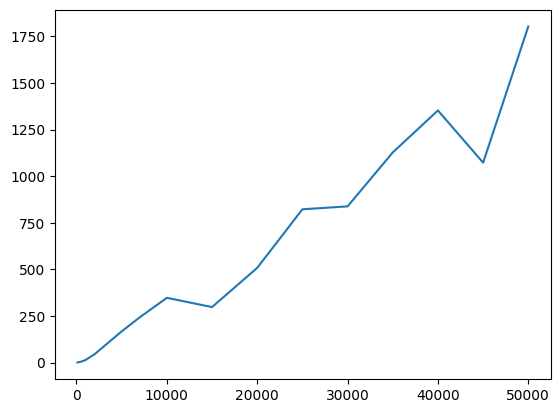

In [28]:
import time
import random

sizes = [100, 500, 1000, 2000, 5000, 7000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000]
samples = [
    random.sample(words, k=size) for size in sizes
]
for sample in samples:
    tst = TernarySearchTree()
sample = random.sample(words, k=100)
tst = TernarySearchTree()
for word in sample:
    tst.insert(word)


nr_samples = 20  # number of random samples to test for each sample size
nr_runs = 10  # number of runs for each sample
times = {}

for size in sizes:
    times[size] = 0.0
    for _ in range(nr_samples):
        sample = random.sample(words, k=size)
        tst = TernarySearchTree()
        for word in sample:
            tst.insert(word)
        for _ in range(nr_runs):
            start_time = time.time_ns()
            for word in sample:
                tst.insert(word)
            end_time = time.time_ns()
            times[size] += end_time - start_time
    times[size] /= nr_runs * nr_samples * 1_000_000.0

print(times)

import matplotlib.pyplot as plt
plt.plot(times.keys(), times.values());

Insertion times: {100: 1.056485, 500: 8.115725, 1000: 30.46599, 5000: 82.109535, 10000: 167.87111, 20000: 433.491955, 30000: 864.8803, 40000: 1221.643525, 50000: 1362.966885}
Search times: {100: 0.40196, 500: 2.205385, 1000: 5.832765, 5000: 25.806005, 10000: 53.83384, 20000: 151.82146, 30000: 325.30665, 40000: 437.3636, 50000: 507.01167}


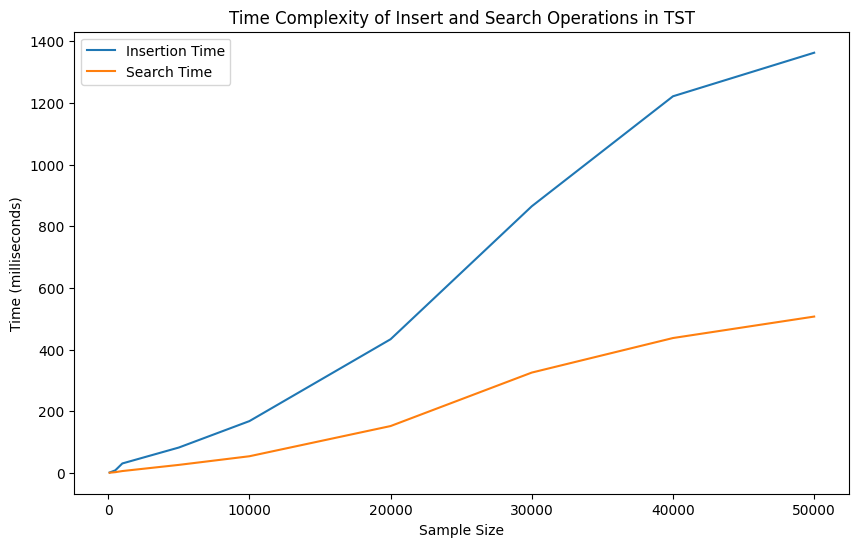

In [30]:
import time
import random
import matplotlib.pyplot as plt

# assume 'words' and 'TernarySearchTree' are already defined
sizes = [100, 500, 1000, 5000, 10000, 20000, 30000, 40000, 50000]
nr_samples = 20  # number of random samples to test for each sample size
nr_runs = 10  # number of runs for each sample

times_insert = {}
times_search = {}

for size in sizes:
    times_insert[size] = 0.0
    times_search[size] = 0.0
    for _ in range(nr_samples):
        sample = random.sample(words, k=size)
        tst = TernarySearchTree()

        # measure insertion time
        start_time = time.time_ns()
        for word in sample:
            tst.insert(word)
        end_time = time.time_ns()
        times_insert[size] += end_time - start_time

        # measure search time
        start_time = time.time_ns()
        for word in sample:
            tst.search(word)
        end_time = time.time_ns()
        times_search[size] += end_time - start_time

    times_insert[size] /= nr_samples * 1_000_000.0
    times_search[size] /= nr_samples * 1_000_000.0

# print times
print("Insertion times:", times_insert)
print("Search times:", times_search)

# plot times
plt.figure(figsize=(10,6))
plt.plot(times_insert.keys(), times_insert.values(), label='Insertion Time')
plt.plot(times_search.keys(), times_search.values(), label='Search Time')
plt.xlabel('Sample Size')
plt.ylabel('Time (milliseconds)')
plt.title('Time Complexity of Insert and Search Operations in TST')
plt.legend()
plt.show()

O(N): Time = 0.028967793244854385 * Size + -40.41721246046635
O(L + logN): Time = 199.79066803608129 * (Size * log(Size)) + -1247.560714784371


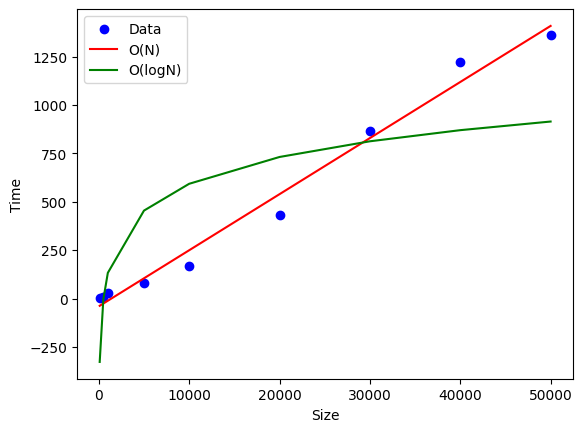

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Your list of sample sizes and times
sizes = [100, 500, 1000, 2000, 5000, 7000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000]
times = [1.135782, 6.147549, 14.506418, 120.029209, 306.051674, 328.940101, 461.293701, 640.49909, 1016.04186]

# list the sizes and times from the dictionaries times_insert and times_search
sizes = list(times_insert.keys())
times = list(times_insert.values())


# Convert lists to numpy arrays
sizes = np.array(sizes)
times = np.array(times)


coefficients_L = np.polyfit(sizes, times, 1)
slope_L, intercept_L = coefficients_L
print(f"O(N): Time = {slope_L} * Size + {intercept_L}")


sizes_log = np.log(sizes)
coefficients_log = np.polyfit(sizes_log, times, 1)
slope_log, intercept_log = coefficients_log
print(f"O(L + logN): Time = {slope_log} * (Size * log(Size)) + {intercept_log}")


# Plot the original data and the fitted lines
plt.scatter(sizes, times, color='blue', label='Data')  # original data
plt.plot(sizes, slope_L * sizes + intercept_L, color='red', label='O(N)')
plt.plot(sizes, slope_log * sizes_log + intercept_log, color='green', label='O(logN)')
plt.xlabel('Size')
plt.ylabel('Time')
plt.legend()
plt.show()


## Generating a large dataset for Benchmarking

Although we observed previously a linear relationship between size and time, therefore a time complexity O(N), the dataset might be too small to observe the expected time complexity that we know should be logarithmic. The logarithmic effect becomes more noticeable as the size of the dataset increases since logarithmic growth is slower than linear growth, and the difference becomes more pronounced with larger inputs.

For that purpose, we will generate a larger dataset of 5.000.000 words of length 4, and we will measure the time it takes to insert and search for a word in the dataset. We will use the same approach as before, but this time we will use the `random.choices` function to generate a random word of length 4..

In [36]:
import string

words_larger = [''.join(random.choices(string.ascii_lowercase, k=5)) for _ in range(2000000)]

In [37]:
len(words_larger)

5000000

In [38]:
import time
import random
import matplotlib.pyplot as plt

# assume 'words' and 'TernarySearchTree' are already defined
sizes = [100, 500, 1000, 5000, 10000, 20000, 30000, 40000, 50000, 100000, 500000, 800000,1000000, 2000000
nr_samples = 20  # number of random samples to test for each sample size

times_insert = {}
times_search = {}

for size in sizes:
    times_insert[size] = 0.0
    times_search[size] = 0.0
    for _ in range(nr_samples):
        sample = random.sample(words_larger, k=size)
        tst = TernarySearchTree()

        # measure insertion time
        start_time = time.time_ns()
        for word in sample:
            tst.insert(word)
        end_time = time.time_ns()
        times_insert[size] += end_time - start_time

        # measure search time
        start_time = time.time_ns()
        for word in sample:
            tst.search(word)
        end_time = time.time_ns()
        times_search[size] += end_time - start_time

    times_insert[size] /= nr_samples * 1_000_000.0
    times_search[size] /= nr_samples * 1_000_000.0

# print times
print("Insertion times:", times_insert)
print("Search times:", times_search)

# plot times
plt.figure(figsize=(10,6))
plt.plot(times_insert.keys(), times_insert.values(), label='Insertion Time')
plt.plot(times_search.keys(), times_search.values(), label='Search Time')
plt.xlabel('Sample Size')
plt.ylabel('Time (milliseconds)')
plt.title('Time Complexity of Insert and Search Operations in TST')
plt.legend()
plt.show()

KeyboardInterrupt: 

In [ ]:
sizes = [100, 500, 1_000, 5_000, 10_000, 20_000, 30_000, 40_000, 50_000, 100_000]
samples = [
    random.sample(words, k=size) for size in sizes
]
for sample in samples:
    tst = TernarySearchTree()
sample = random.sample(words, k=100)
tst = TernarySearchTree()
for word in sample:
    tst.insert(word)

nr_samples = 10  # number of random samples to test for each sample size
nr_runs = 10  # number of runs for each sample
times = {}

for size in sizes:
    times[size] = 0.0
    for _ in range(nr_samples):
        sample = random.sample(words, k=size)
        tst = TernarySearchTree()
        for word in sample:
            tst.insert(word)
        for _ in range(nr_runs):
            start_time = time.time_ns()
            for word in sample:
                tst.insert(word)
            end_time = time.time_ns()
            times[size] += end_time - start_time
    times[size] /= nr_runs * nr_samples * 1_000_000.0

times

In [ ]:
#selecting random

import random
import time

tst = TernarySearchTree()

start_time = time.time()
for word in words:
    tst.insert(word)
end_time = time.time()

insert_time = end_time - start_time
print(f"Time taken to insert words: {insert_time} seconds")

In [ ]:
start_time = time.time()
for word in words:
    tst.search(word)
end_time = time.time()

search_time = end_time - start_time
print(f"Time taken to search for words: {search_time} seconds")

In [ ]:
import timeit

tst = TernarySearchTree()
insert_time = timeit.timeit(lambda: tst.insert('helloDumbledore'), number=100000)
print(f'Time to insert a word 1000 times: {insert_time} seconds')

### Discussion on the expected complexity of the algorithm and operations <a name="Discussion_on_the_expected_complexity"></a>

### Comparison of the implementation with the theoretical expectations <a name="Comparison_of_the_implementation_with_the_theoretical_expectations"></a>

## Benchmarking <a name="Benchmarking"></a>

### Generation of a larger dataset <a name="Generation_of_a_larger_dataset"></a>

### Benchmarking the scaling behavior of the implementation <a name="Benchmarking_the_scaling_behavior_of_the_implementation"></a>

### Analysis and interpretation of the benchmarking results <a name="Analysis_and_interpretation_of_the_benchmarking_results"></a>

## Conclusion <a name="Conclusion"></a>

### Summary of the project <a name="Summary_of_the_project"></a>

### Potential improvements and future work <a name="Potential_improvements_and_future_work"></a>

## References <a name="references"></a>

1. Sedgewick, R. & Wayne, K. (2011), Algorithms, 4th Edition. , Addison-Wesley.
2. Karumanchi, N., (2016), Data Structures and Algorithmic Thinking with Python, CareerMonk Publications.